In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
votes = pd.read_csv('house-votes-84.csv', header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
votes

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [13]:
votes_binary = votes.copy()
for col in votes.columns[1:]:
    votes_binary[col] = votes[col].map({'y': 1, 'n': 0, '?': np.nan})
votes_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [19]:
votes_binary['synfuels'][0] = 0.0
votes_imputed = votes_binary.ffill()
votes_imputed

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
y = votes_imputed.party.values
X = votes_imputed.drop('party', axis=1).values

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
y_pred = knn.predict(X)
X_new = pd.DataFrame(
    np.array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477,  0.71946897,
         0.42310646,  0.9807642 ,  0.68482974,  0.4809319 ,  0.39211752,
         0.34317802,  0.72904971,  0.43857224,  0.0596779 ,  0.39804426,
         0.73799541]]))
knn.predict(X_new)

array(['democrat'], dtype=object)

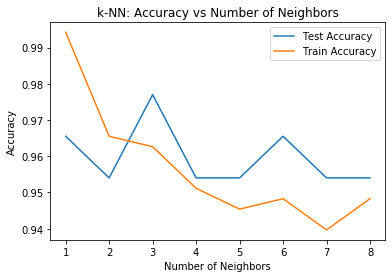

In [44]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN: Accuracy vs Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
from sklearn import datasets

digits = datasets.load_digits()

In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [26]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
digits.images.shape

(1797, 8, 8)

In [28]:
digits.data.shape

(1797, 64)

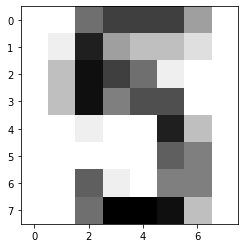

In [29]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [49]:
X = digits.data
y = digits.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [51]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9833333333333333


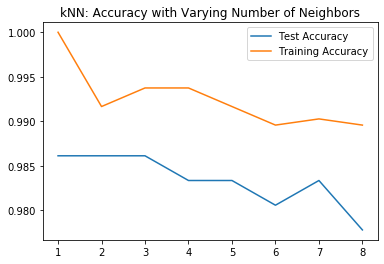

In [52]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('kNN: Accuracy with Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()

In [54]:
gap = pd.read_csv('gm_2008_region.csv')
X = gap.fertility
y = gap.life
print(X.shape)
print(y.shape)

(139,)
(139,)
